In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('solar_energy_prediction_dataset.csv')

In [4]:
df

,Date,Time,Elevation,Temperature,Humidity,Solar_Irradiance,Cloud_Cover,Wind_Speed,Solar_Production
0,2024-12-27,10:13:00,7,21,40,113,0.462104,4.998369,197
1,2024-03-07,18:08:00,7,20,46,198,0.393681,4.710141,270
2,2024-11-04,08:26:00,1,35,86,144,0.032661,8.472354,719
3,2024-06-07,14:12:00,3,27,59,688,0.181196,4.829398,957
4,2024-08-16,18:34:00,1,17,50,528,0.101556,4.698844,624
...,...,...,...,...,...,...,...,...,...
995,2024-12-03,08:20:00,7,32,41,432,0.024966,3.220431,148
996,2024-06-16,19:34:00,1,24,82,769,0.352080,4.413662,173
997,2024-07-12,17:46:00,1,22,46,213,0.229159,7.814732,715
998,2024-08-08,15:19:00,0,22,73,292,0.408223,5.066284,784


In [5]:
print(df.isnull().sum())

Date                0
Time                0
Elevation           0
Temperature         0
Humidity            0
Solar_Irradiance    0
Cloud_Cover         0
Wind_Speed          0
Solar_Production    0
dtype: int64


In [6]:
df.head()

,Date,Time,Elevation,Temperature,Humidity,Solar_Irradiance,Cloud_Cover,Wind_Speed,Solar_Production
0,2024-12-27,10:13:00,7,21,40,113,0.462104,4.998369,197
1,2024-03-07,18:08:00,7,20,46,198,0.393681,4.710141,270
2,2024-11-04,08:26:00,1,35,86,144,0.032661,8.472354,719
3,2024-06-07,14:12:00,3,27,59,688,0.181196,4.829398,957
4,2024-08-16,18:34:00,1,17,50,528,0.101556,4.698844,624


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Time              1000 non-null   object 
 2   Elevation         1000 non-null   int64  
 3   Temperature       1000 non-null   int64  
 4   Humidity          1000 non-null   int64  
 5   Solar_Irradiance  1000 non-null   int64  
 6   Cloud_Cover       1000 non-null   float64
 7   Wind_Speed        1000 non-null   float64
 8   Solar_Production  1000 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 70.4+ KB


In [8]:
df.describe()

,Elevation,Temperature,Humidity,Solar_Irradiance,Cloud_Cover,Wind_Speed,Solar_Production
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.587000,24.636000,60.050000,463.310000,0.252828,5.413219,537.578000
std,2.881794,8.562992,17.363842,201.266654,0.143615,2.548806,263.641933
min,0.000000,10.000000,30.000000,100.000000,0.001837,1.004126,100.000000
25%,2.000000,17.000000,45.000000,290.000000,0.120967,3.212623,302.750000
50%,5.000000,25.000000,61.000000,464.000000,0.256453,5.453235,537.000000
75%,7.000000,32.000000,75.000000,638.000000,0.379096,7.553670,759.500000
max,9.000000,39.000000,89.000000,799.000000,0.499428,9.999592,999.000000


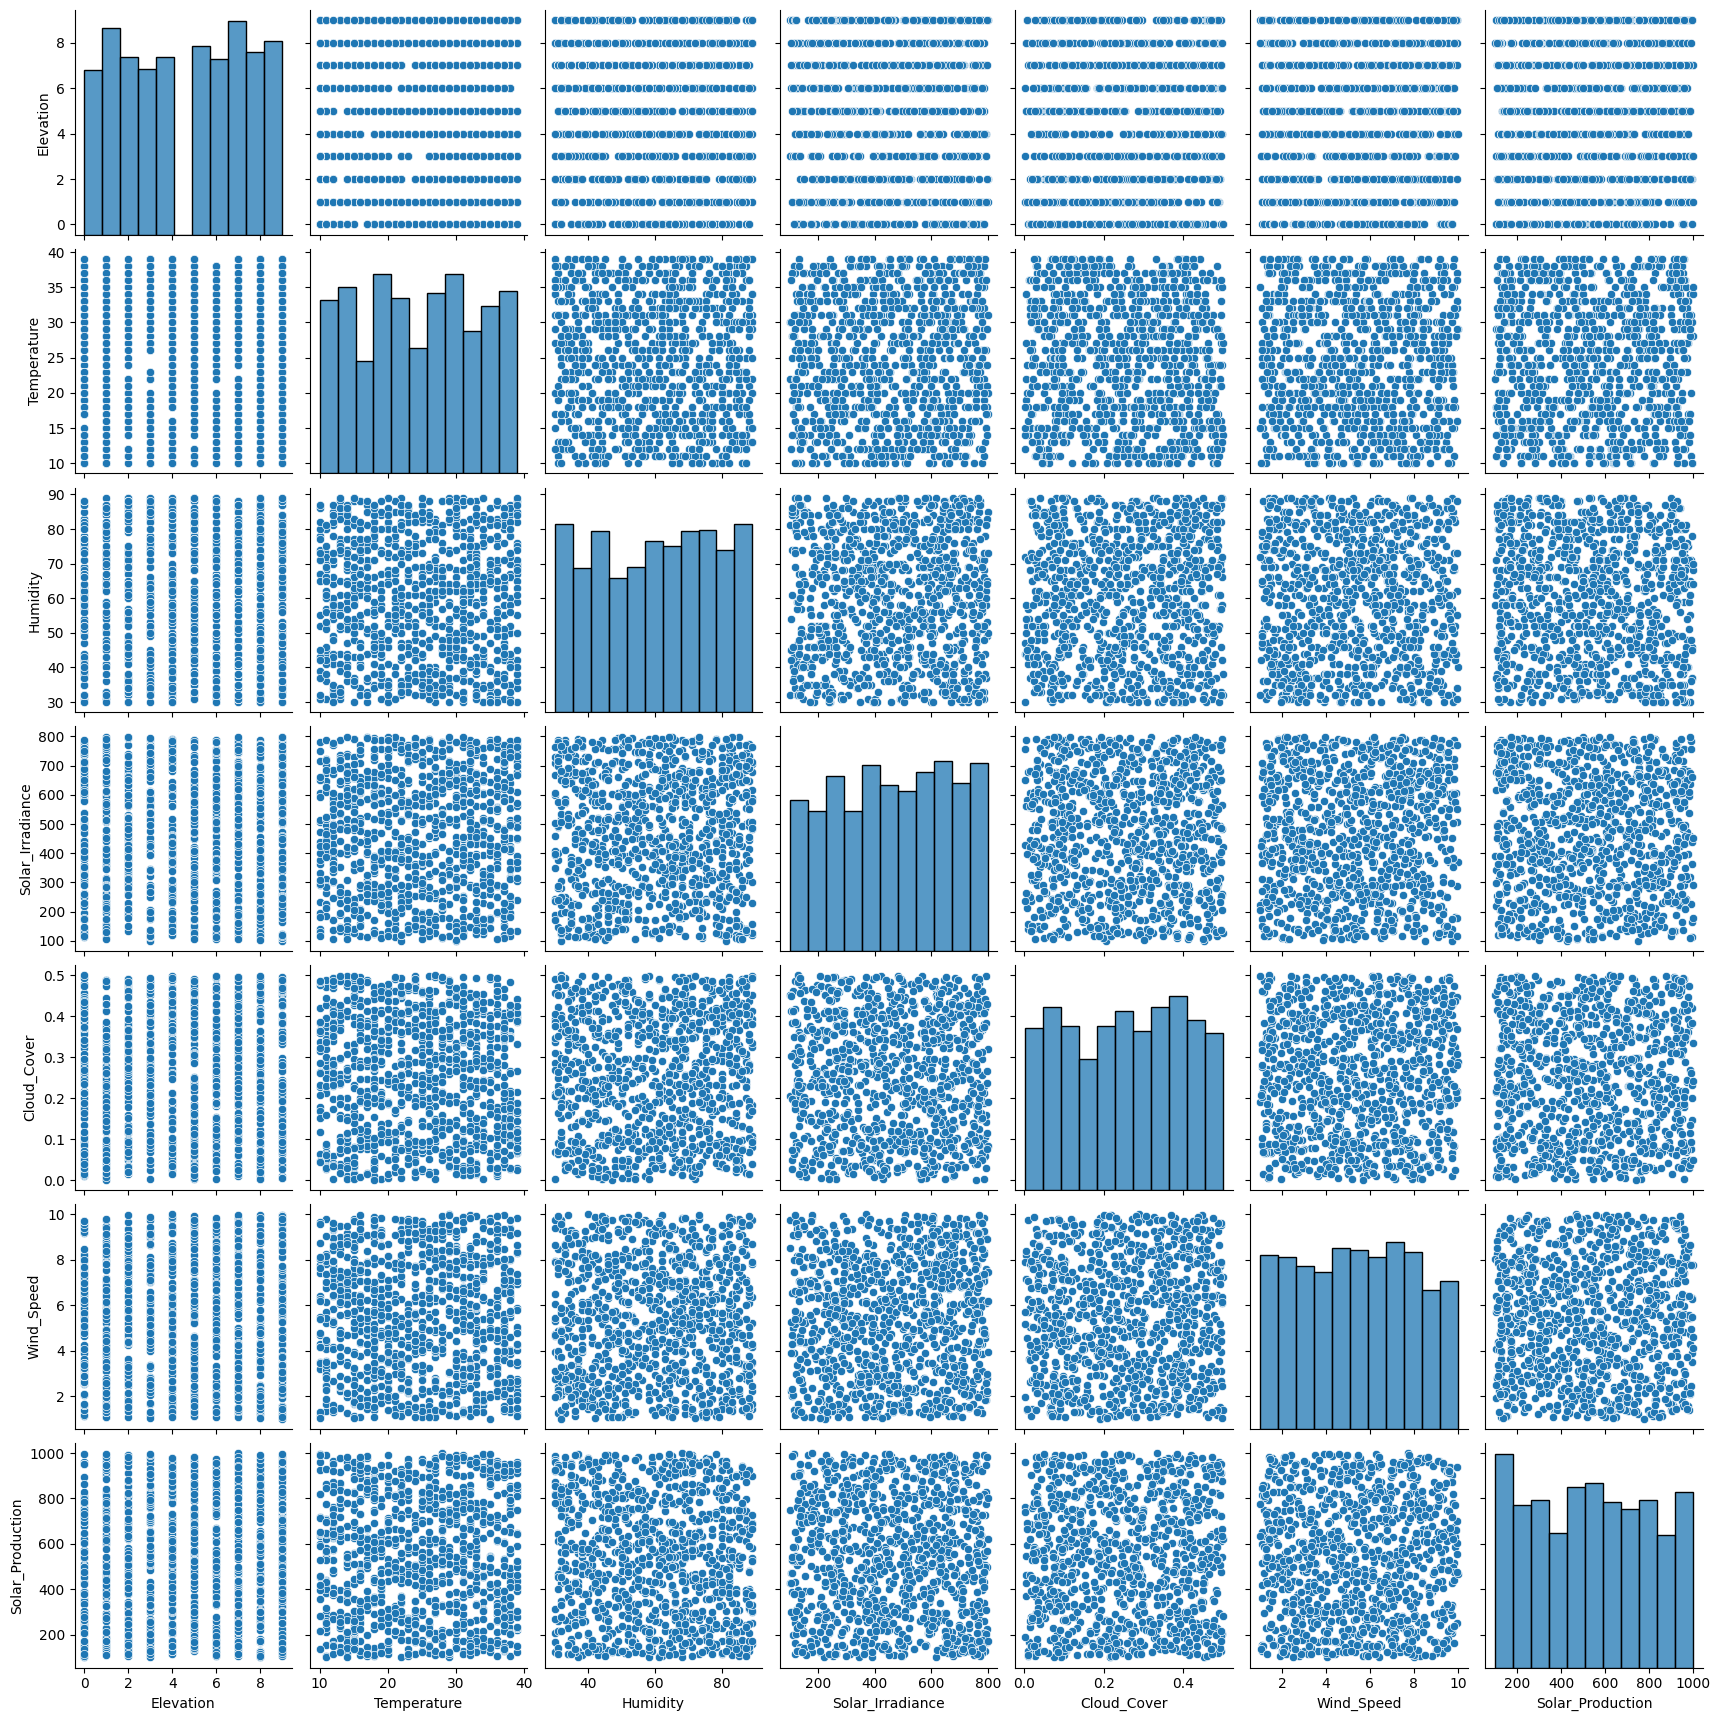

In [9]:
sns.pairplot(df)

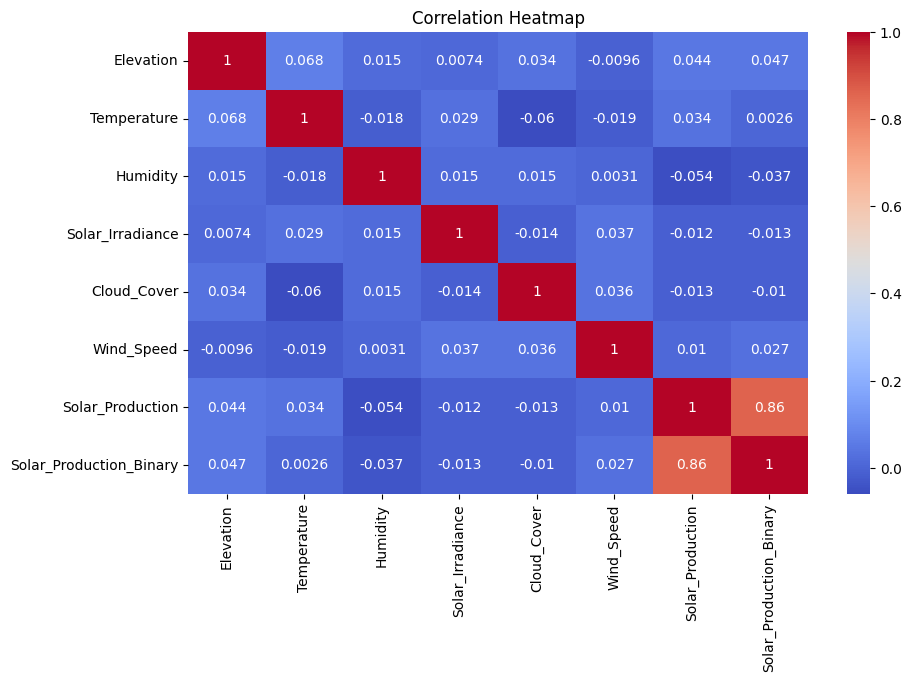

In [27]:
# Convert Date and Time to datetime if necessary
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Drop the non-numeric columns for correlation
numeric_data = df.drop(['Date', 'Time'], axis=1)

# Plotting correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [28]:
df.columns

Index(['Date', 'Time', 'Elevation', 'Temperature', 'Humidity',
       'Solar_Irradiance', 'Cloud_Cover', 'Wind_Speed', 'Solar_Production',
       'Solar_Production_Binary'],
      dtype='object')

In [34]:
from sklearn.metrics import precision_score, recall_score

threshold = df['Solar_Production'].median()
df['Solar_Production_Binary'] = (df['Solar_Production'] > threshold).astype(int)

features = ['Elevation', 'Temperature', 'Humidity', 'Solar_Irradiance', 'Cloud_Cover', 'Wind_Speed',]
X = df[features]
y = df['Solar_Production_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score : ", accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score :  0.47
Precision: 0.47
Recall: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.54      0.50       148
           1       0.47      0.40      0.43       152

    accuracy                           0.47       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.47      0.47       300



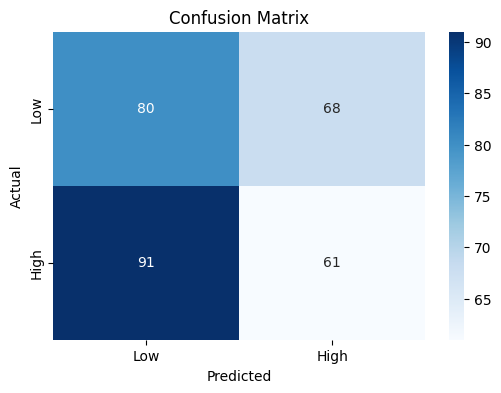

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

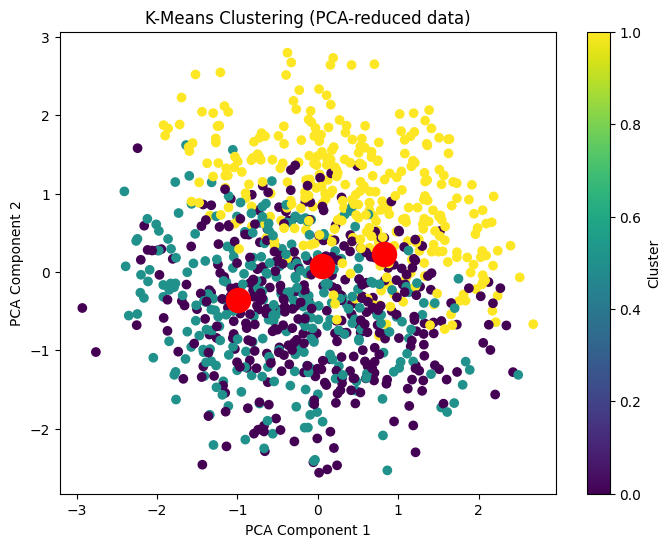

In [48]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# # Optional: Print cluster centers
# print("Cluster centers:")
# print(kmeans.cluster_centers_)